## Narrative Analytics and Experimentation Proposal

> An alcohol distributor is researching low traffic continents for countries with potential growth opportunities. This dataset contains the amount of servings from bars, restaurants, and more for nearly 200 countries in 5 continents to track local consumer trends. The strategy is to seek countries with low influence in one of the facets of alcohol consumption to strategize future marketing campaigns for popular products to potentially lead the competitive market by inspiring a potential trend. 

> We discovered a low interquartile range in the continent of Africa and the Oceanic region for wine consumption with many interesting outliers. The datapoints for the outliers represent specific countries with higher consumption rates. Those datapoints could potentially become trend leaders for our superior wine collections that may incite a trend that will expand to other countries nearby. 

### The Problem

> Should we strategize a campaign within Africa or Oceania? It would be very costly and time consuming to conduct deeper consumer analysis for both countries. There could be many factors attributed to consumption rates which could include accessibility, preferences, and/or more.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
drinks = pd.read_csv('C:/Users/marwi/OneDrive/Desktop/Git/part2/session_5-master/data/drinks.csv')

In [3]:
drinks.rename(columns={'beer_servings':'beer', 'spirit_servings':'spirits', 'wine_servings':'wine', 'total_litres_of_pure_alcohol':'spirit_litres'}, inplace=True)
drinks.head()

,country,beer,spirits,wine,spirit_litres,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


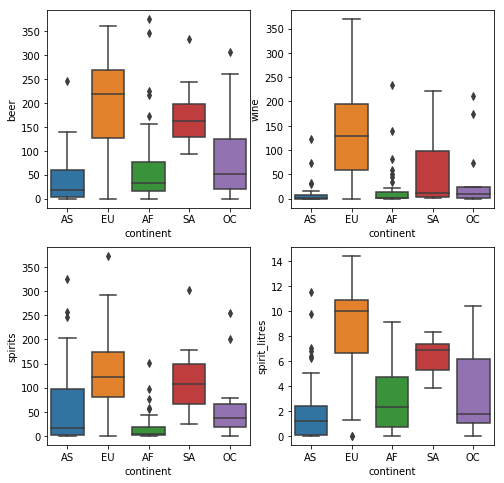

In [4]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.boxplot(x='continent', y='beer', data=drinks)

plt.subplot(2,2,2)
sns.boxplot(x='continent', y='wine', data=drinks)

plt.subplot(2,2,3)
sns.boxplot(x='continent', y='spirits', data=drinks)

plt.subplot(2,2,4)
sns.boxplot(x='continent', y='spirit_litres', data=drinks)
plt.show();

The comparison of wine consumption based on continent shows an opportunity in Africa and Oceania with Africa having a lower interquartile range but with many significant outliers. The EU and SA have a much higher interquartile range which could represent much more competition. AS has the lowest range and outliers that could be examined at a later time. With the higher range of outliers in AF and OC, this could represent a higher potential to penetrate the market effectively.

In [5]:
dr1 = drinks.loc[((drinks['continent']=='AF') | (drinks['continent']=='OC')),
                ['continent', 'country', 'wine']]

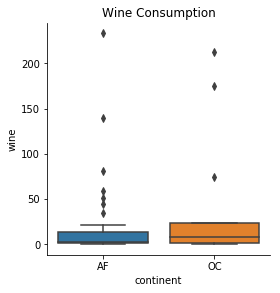

In [6]:
sns.factorplot(x='continent', y='wine', data=dr1, kind='box');
plt.title('Wine Consumption')
plt.show();

In [7]:
dr1['continent'].replace('AF', 0, inplace=True)
dr1['continent'].replace('OC', 1, inplace=True)

In [8]:
print('AF countries:', len(dr1[dr1.continent==0]))
print('OC countries:', len(dr1[dr1.continent==1]))

AF countries: 53
OC countries: 16


In [9]:
print('AF:', dr1[dr1.continent == 0].wine.mean())
print('OC:', dr1[dr1.continent == 1].wine.mean())

AF: 16.264150943396228
OC: 35.625


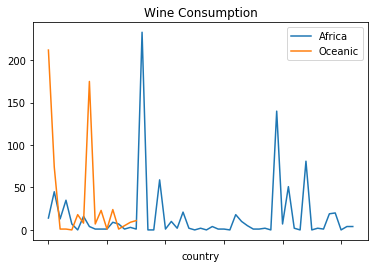

In [10]:
consumption = dr1[dr1.continent==0][['country', 'wine']].groupby('country').mean().plot()
dr1[dr1.continent==1][['country', 'wine']].groupby('country').mean().plot(ax=consumption)
plt.legend(['Africa', 'Oceanic'])
plt.title('Wine Consumption')
plt.show()

In [11]:
stats.ttest_ind(dr1[dr1.continent==0].wine,
               dr1[dr1.continent==1].wine)

Ttest_indResult(statistic=-1.4796304750364608, pvalue=0.14365872119258638)

## Null Hypothesis

Above we can see that AF has a wider range of countries with many significant spikes and OC has a much lower proportion of countries with two significant spikes. The p-value of 0.1436 is nearly three times the desired threshold of 0.05. Meaning that we should take into consideration the null hypothesis of no effect. In this case, there is nearly a 15% chance that there may not be enough interest in wine in either Africa or Oceania for a successful marketing campaign.

In [11]:
dr1[dr1['continent']==0].sort_values('wine', ascending=False).head(10)

,continent,country,wine
55,0,Equatorial Guinea,233
148,0,Sao Tome & Principe,140
159,0,South Africa,81
62,0,Gabon,59
152,0,Seychelles,51
4,0,Angola,45
22,0,Botswana,35
71,0,Guinea-Bissau,21
175,0,Tunisia,20
172,0,Togo,19


In [12]:
dr1[dr1['continent']==1].sort_values('wine', ascending=False).head(10)

,continent,country,wine
8,1,Australia,212
121,1,New Zealand,175
40,1,Cook Islands,74
146,1,Samoa,24
129,1,Palau,23
110,1,Micronesia,18
187,1,Vanuatu,11
178,1,Tuvalu,9
118,1,Nauru,8
125,1,Niue,7


## The Potential Solution and Method of Testing

> Further market research should be conducted in Africa. The method of testing would be conducted in Equatorial Guinea and Sao Tome & Principe due to a high potential for test subjects. We will conduct A/B testing with local popular wines as the control variable and our wine collections as the test variable with similar demographic groups of random subjects. 

> We will calculate the taste preferences of the groups for one month to collect a significant sample of the population. Continuing by gathering data on the taste preferences for targeting demographic groups and assign a taste profile for future marketing strategies.

> If the test groups show a higher average of preference for our wine collection, we will utilize the taste profiles assigned to each demographic to begin formulating tests for marketing strategies. If the test groups show slightly less than average preference for our wine collection we will continue the study for another month. But, if the test groups show significantly less than average preference for our wine collection we will begin planning on conducting tests in Oceania by seeking test subjects in Australia and New Zealand.

## Conclusion

Equatorial Guinea is one of the richest countries in Africa. We can research insights for a wide range of demographics from a population of nearly 1.3 million, of which we hope to learn from high-income consumers. Sao Tome & Principe has a more lower-middle income demographic for a population of nearly 200 thousand, of which we hope to learn how to reach a large portion of the lower-income populations in other countries. By conducting research in both locations we can learn marketing strategies for both our premium collections as well as the lower-tier collections. With this information we can potentially penetrate the market for both upper and lower income consumers before continuing expansion to other targeted countries.